In [36]:
!pip install --upgrade seaborn

Importing Libraries

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
import os
warnings.filterwarnings('ignore')
print(os.listdir('/content'))

['.config', 'vectorizer.joblib', 'preprocess_text_function.pkl', 'label_encoder.joblib', 'bbc-text.csv', 'SVM_model.joblib', 'sample_data']


In [38]:
df = pd.read_csv('/content/bbc-text.csv')
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   text      2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [40]:
categories = df['category'].unique()
categories

array(['tech', 'business', 'sport', 'entertainment', 'politics'],
      dtype=object)

Visualizing Category Distribution

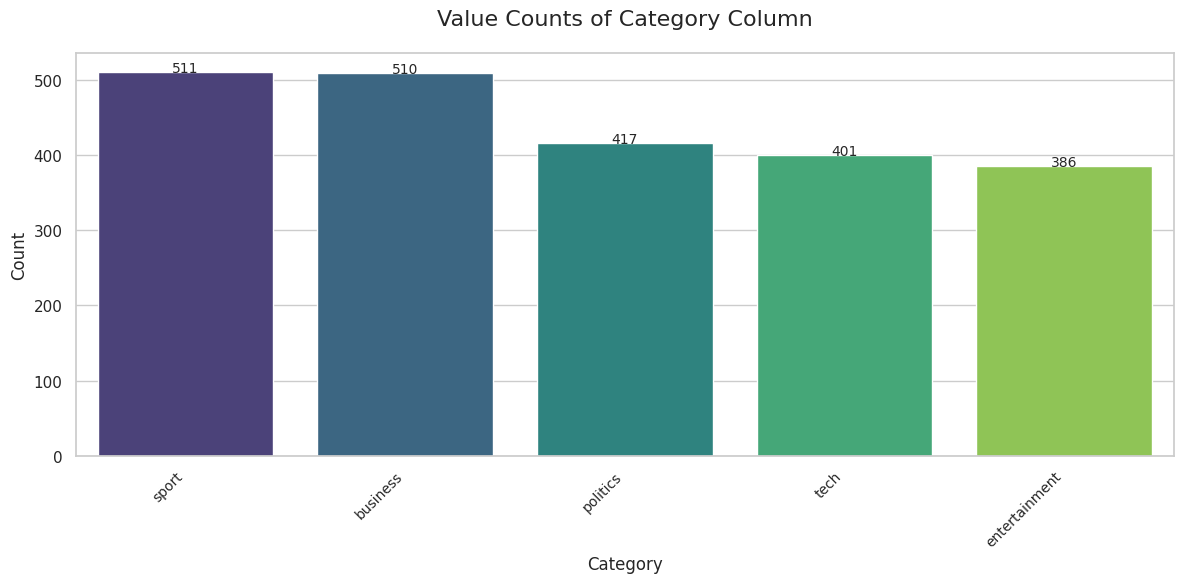

In [41]:
value_counts = df['category'].value_counts()
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
ax=sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis", hue=value_counts.index, legend=False)
ax.set_title('Value Counts of Category Column', fontsize=16, pad=20)
ax.set_xlabel('Category', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.tick_params(axis='x', rotation=45)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=10)
plt.tight_layout()
plt.show()

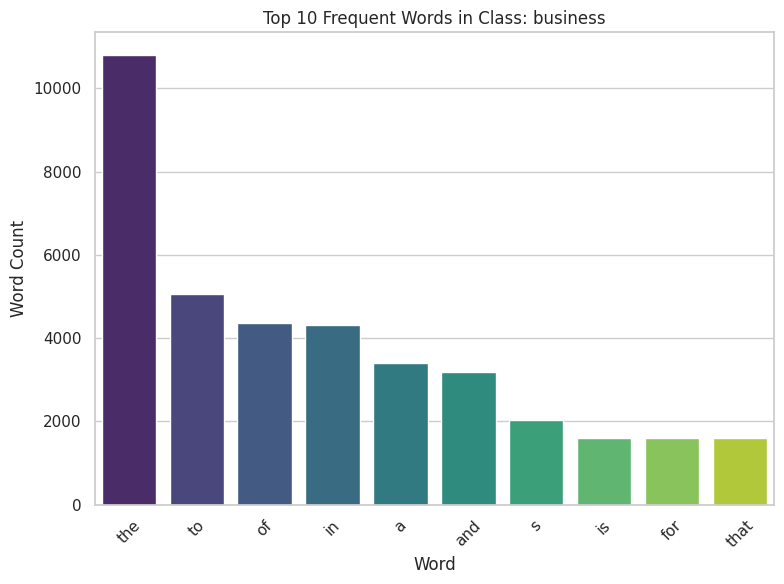

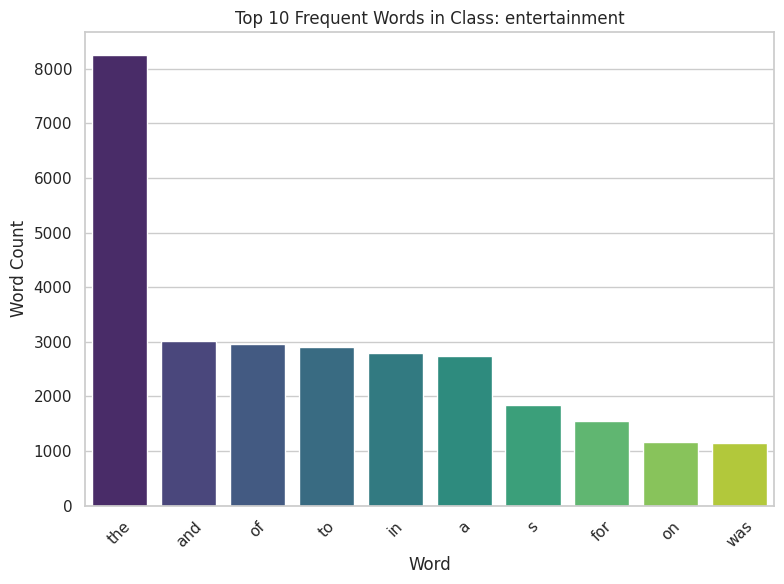

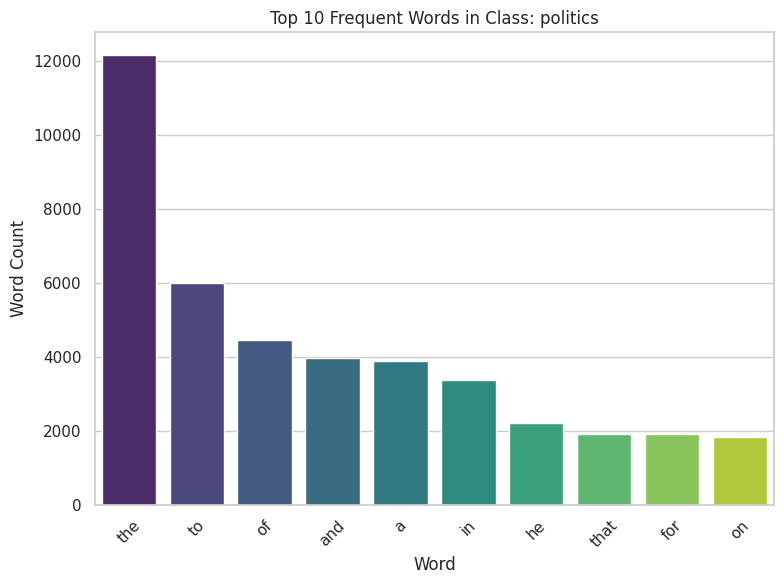

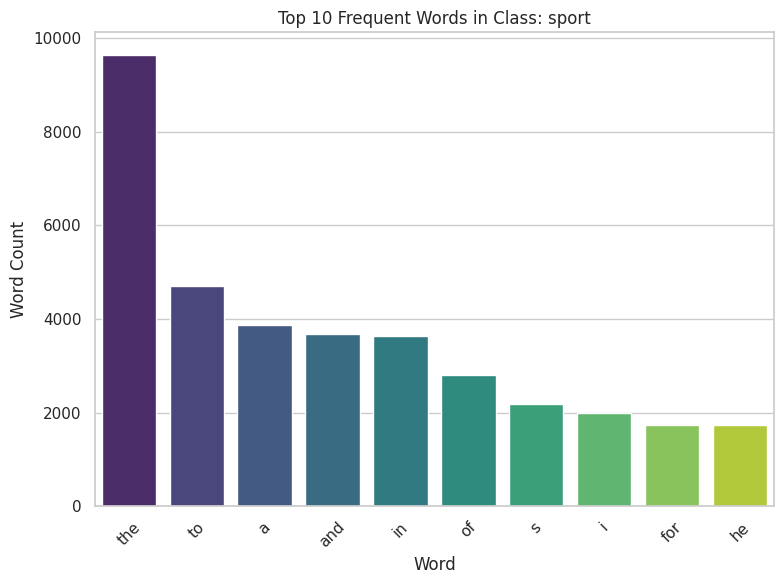

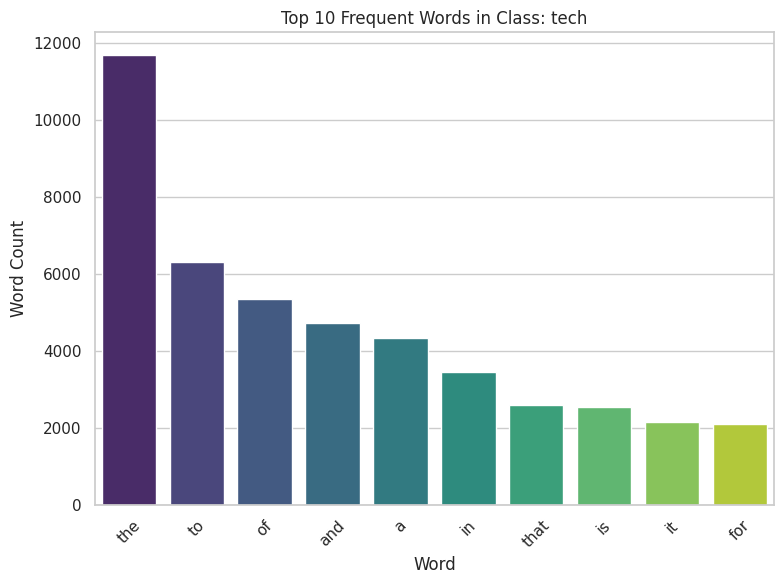

In [42]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

def get_top_words_by_class(df, text_column_name):
    top_words_by_class = {}
    grouped = df.groupby('category')

    for category, group_df in grouped:
        text = ' '.join(group_df[text_column_name])
        words = text.split()
        word_counts = Counter(words)
        top_words = dict(word_counts.most_common(10))
        top_words_by_class[category] = top_words

        top_words_df = pd.DataFrame({
            'Word': list(top_words.keys()),
            'Count': list(top_words.values())
        })

        plt.figure(figsize=(8, 6))
        ax = sns.barplot(
            x='Word', y='Count', data=top_words_df, palette='viridis'
        )
        plt.title(f'Top 10 Frequent Words in Class: {category}')
        plt.xlabel('Word')
        plt.ylabel('Word Count')
        plt.xticks(rotation=45)
        plt.tight_layout()

        plt.show()

get_top_words_by_class(df, 'text')


Data Preprocessing

In [43]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

def preprocess_text(text):
    text = text.lower()
    words = word_tokenize(text)
    filtered_words = [word for word in words if word not in stop_words and word not in punctuation]
    return ' '.join(filtered_words)

df['text_processed'] = df['text'].apply(preprocess_text)
df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,category,text,text_processed
0,tech,tv future in the hands of viewers with home th...,tv future hands viewers home theatre systems p...
1,business,worldcom boss left books alone former worldc...,worldcom boss left books alone former worldcom...
2,sport,tigers wary of farrell gamble leicester say ...,tigers wary farrell gamble leicester say rushe...
3,sport,yeading face newcastle in fa cup premiership s...,yeading face newcastle fa cup premiership side...
4,entertainment,ocean s twelve raids box office ocean s twelve...,ocean twelve raids box office ocean twelve cri...
...,...,...,...
2220,business,cars pull down us retail figures us retail sal...,cars pull us retail figures us retail sales fe...
2221,politics,kilroy unveils immigration policy ex-chatshow ...,kilroy unveils immigration policy ex-chatshow ...
2222,entertainment,rem announce new glasgow concert us band rem h...,rem announce new glasgow concert us band rem a...
2223,politics,how political squabbles snowball it s become c...,political squabbles snowball become commonplac...


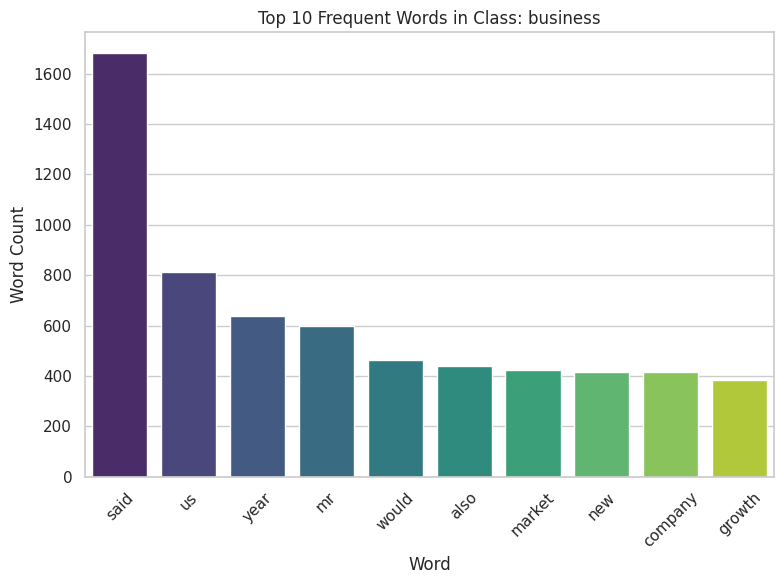

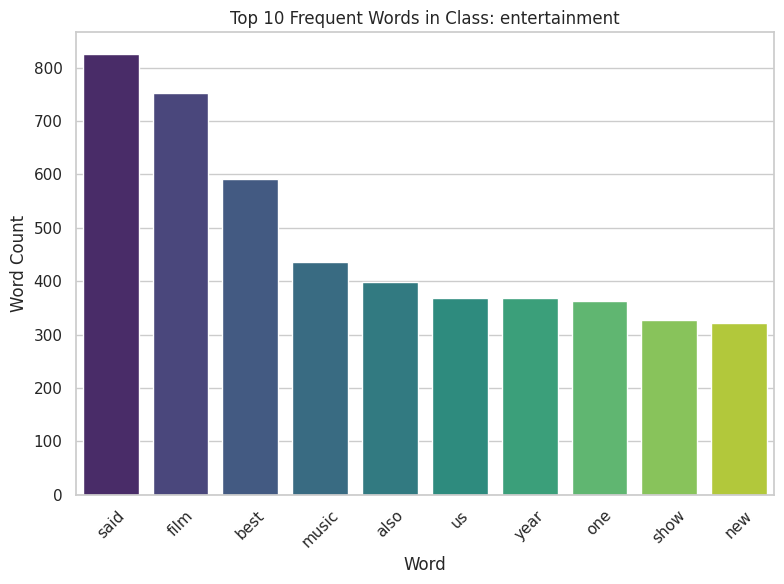

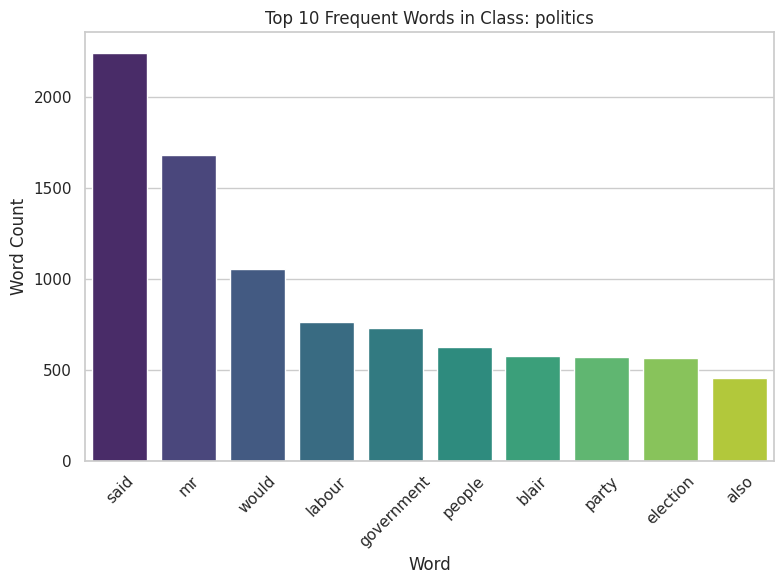

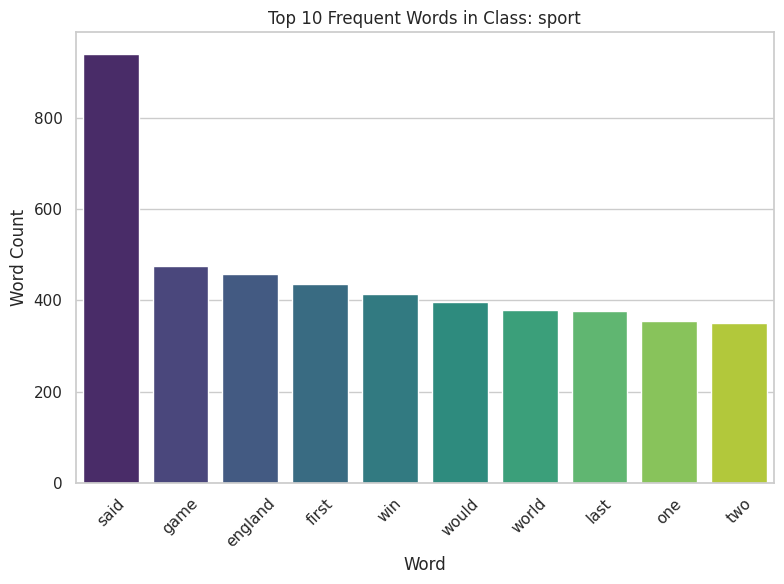

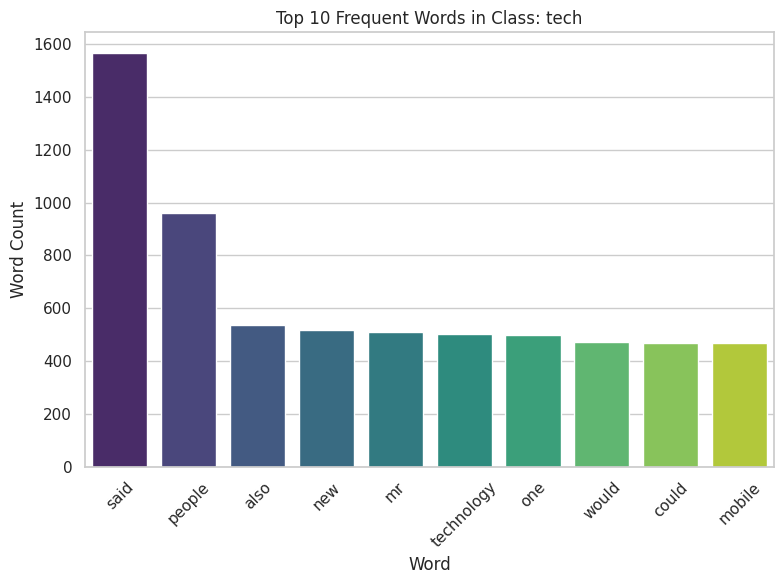

In [44]:
get_top_words_by_class(df,'text_processed')

Creating Word Cloud

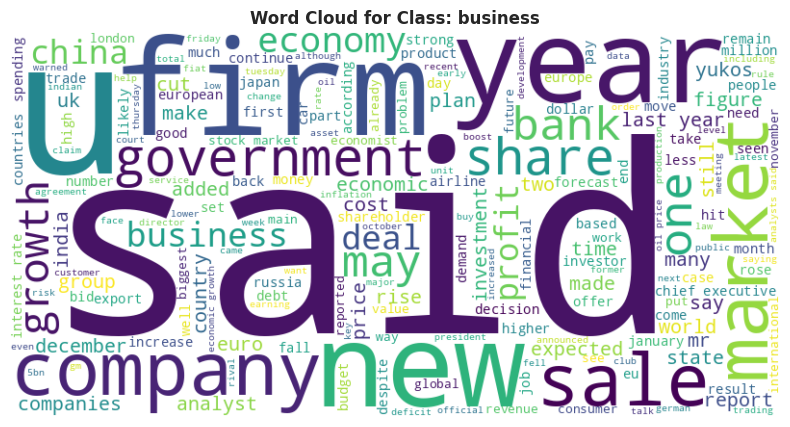

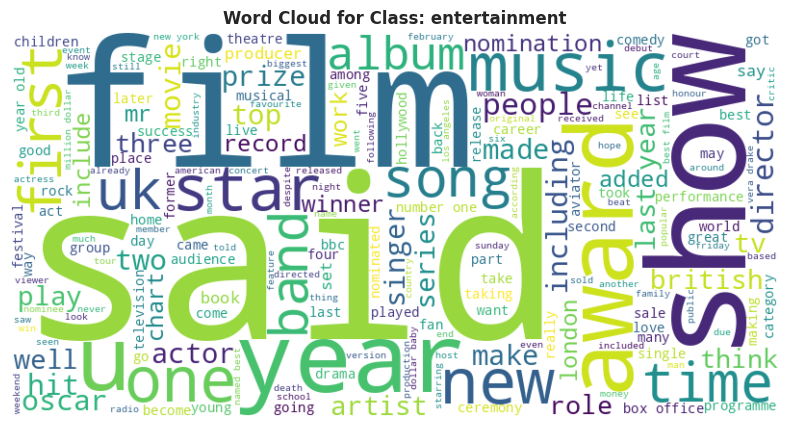

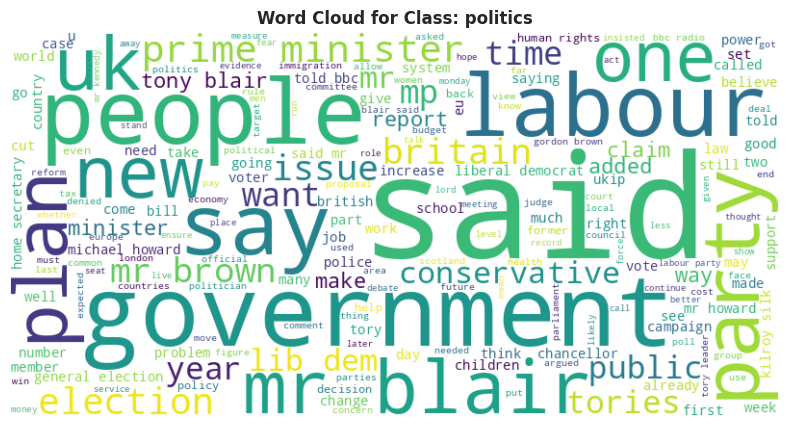

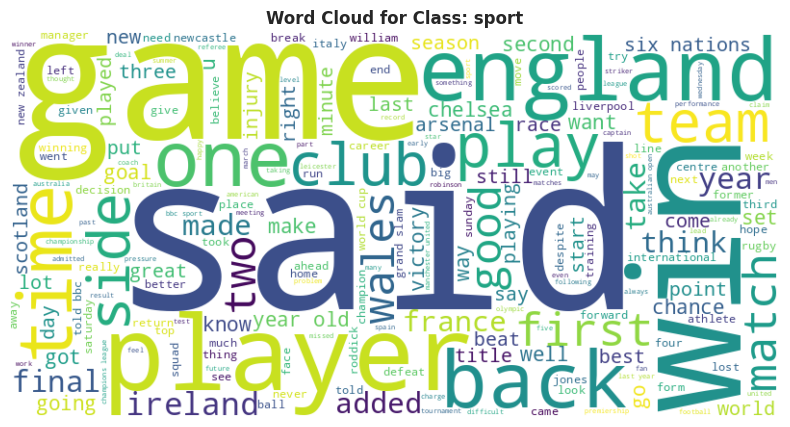

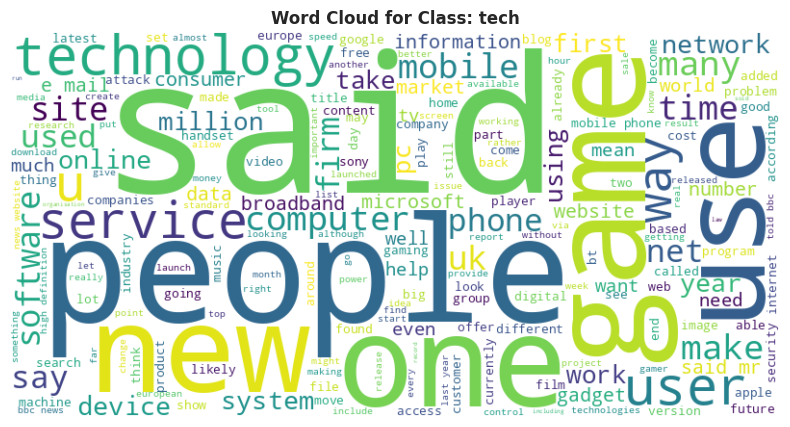

In [45]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def create_word_clouds(df, text_column_name):
    grouped = df.groupby('category')

    for category, group_df in grouped:
        text = ' '.join(group_df[text_column_name])
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f'Word Cloud for Class: {category}', fontweight='bold')
        plt.axis('off')
        plt.show()
        print("\n")
create_word_clouds(df, 'text_processed')


Label Encoding

In [46]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['category'] = label_encoder.fit_transform(df['category'])
class_names = label_encoder.classes_
X = df['text_processed']
y = df['category']
y

,category
0,4
1,0
2,3
3,3
4,1
...,...
2220,0
2221,2
2222,1
2223,2


Text Vectorization with TF-IDF

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)

Training and Testing Sets

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

Model Evaluation

In [49]:
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    precision_score,
    recall_score,
    f1_score,
    accuracy_score,
)
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate(model, conf_matrix=True, return_=False):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    if conf_matrix:
        plt.figure(figsize=(8, 6))
        sns.heatmap(
            cm,
            annot=True,
            fmt="d",
            cmap="Blues",
            cbar=False,
            xticklabels=class_names,
            yticklabels=class_names,
        )
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix")
        plt.show()

    print(classification_report(y_test, y_pred, target_names=class_names))

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")

    model_name = str(type(model).__name__)

    if return_:
        metrics_dict = {
            "Model": model_name,
            "accuracy": round(accuracy, 2),
            "precision": round(precision, 2),
            "recall": round(recall, 2),
            "f1": round(f1, 2),
        }
        return metrics_dict


Support Vector Machine (SVM) Model

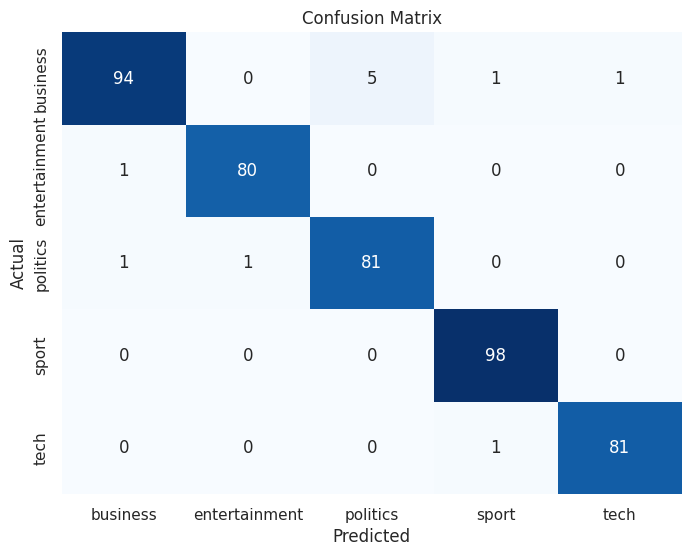

               precision    recall  f1-score   support

     business       0.98      0.93      0.95       101
entertainment       0.99      0.99      0.99        81
     politics       0.94      0.98      0.96        83
        sport       0.98      1.00      0.99        98
         tech       0.99      0.99      0.99        82

     accuracy                           0.98       445
    macro avg       0.98      0.98      0.98       445
 weighted avg       0.98      0.98      0.98       445

Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1-Score: 0.98


In [50]:
from sklearn.svm import SVC
svc = SVC(kernel="linear", random_state=42, probability=True, C=3)
svc.fit(X_train, y_train)
evaluate(svc)

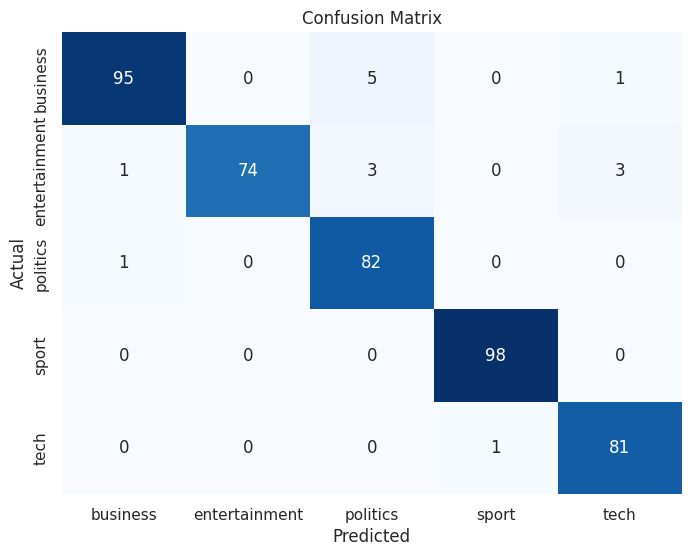

               precision    recall  f1-score   support

     business       0.98      0.94      0.96       101
entertainment       1.00      0.91      0.95        81
     politics       0.91      0.99      0.95        83
        sport       0.99      1.00      0.99        98
         tech       0.95      0.99      0.97        82

     accuracy                           0.97       445
    macro avg       0.97      0.97      0.97       445
 weighted avg       0.97      0.97      0.97       445

Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1-Score: 0.97


In [51]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB(alpha=0.2)

naive_bayes.fit(X_train, y_train)
evaluate(naive_bayes)

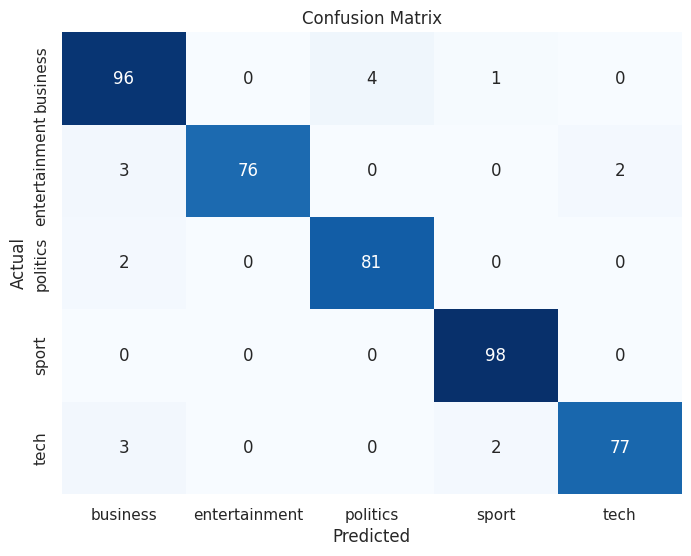

               precision    recall  f1-score   support

     business       0.92      0.95      0.94       101
entertainment       1.00      0.94      0.97        81
     politics       0.95      0.98      0.96        83
        sport       0.97      1.00      0.98        98
         tech       0.97      0.94      0.96        82

     accuracy                           0.96       445
    macro avg       0.96      0.96      0.96       445
 weighted avg       0.96      0.96      0.96       445

Accuracy: 0.96
Precision: 0.96
Recall: 0.96
F1-Score: 0.96


In [52]:
from sklearn.linear_model import LogisticRegression
Logistic_Regression = LogisticRegression(random_state=42)
Logistic_Regression.fit(X_train, y_train)
evaluate(Logistic_Regression)

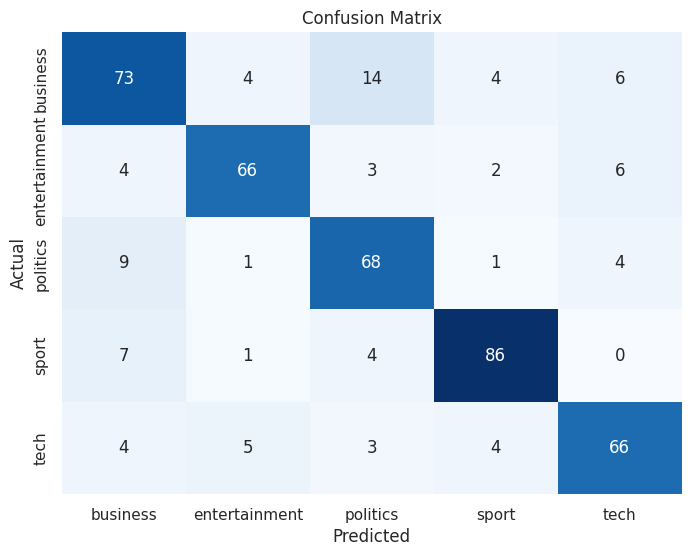

               precision    recall  f1-score   support

     business       0.75      0.72      0.74       101
entertainment       0.86      0.81      0.84        81
     politics       0.74      0.82      0.78        83
        sport       0.89      0.88      0.88        98
         tech       0.80      0.80      0.80        82

     accuracy                           0.81       445
    macro avg       0.81      0.81      0.81       445
 weighted avg       0.81      0.81      0.81       445

Accuracy: 0.81
Precision: 0.81
Recall: 0.81
F1-Score: 0.81


In [53]:
from sklearn.tree import DecisionTreeClassifier
Decision_Tree = DecisionTreeClassifier(random_state=42)
Decision_Tree.fit(X_train, y_train)
evaluate(Decision_Tree)

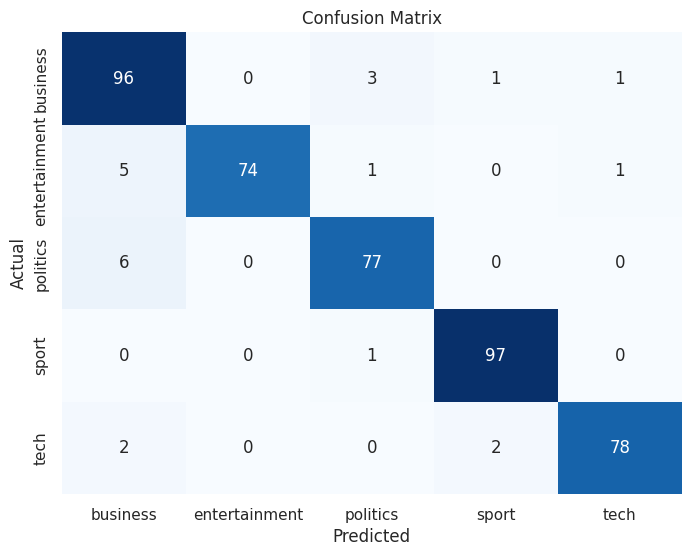

               precision    recall  f1-score   support

     business       0.88      0.95      0.91       101
entertainment       1.00      0.91      0.95        81
     politics       0.94      0.93      0.93        83
        sport       0.97      0.99      0.98        98
         tech       0.97      0.95      0.96        82

     accuracy                           0.95       445
    macro avg       0.95      0.95      0.95       445
 weighted avg       0.95      0.95      0.95       445

Accuracy: 0.95
Precision: 0.95
Recall: 0.95
F1-Score: 0.95


In [54]:
from sklearn.ensemble import RandomForestClassifier
Random_Forest = RandomForestClassifier(
    n_estimators=200, random_state=42, criterion="entropy"
)
Random_Forest.fit(X_train, y_train)
evaluate(Random_Forest)

In [55]:
classifiers = [
    Logistic_Regression,
    svc,
    naive_bayes,
    Decision_Tree,
    Random_Forest,
]

dfs = []

for classifier in classifiers:
    metrics_result = evaluate(classifier, return_=True, conf_matrix=False)
    metrics_df = pd.DataFrame([metrics_result])
    dfs.append(metrics_df)

results_df = pd.concat(dfs, ignore_index=True)


               precision    recall  f1-score   support

     business       0.92      0.95      0.94       101
entertainment       1.00      0.94      0.97        81
     politics       0.95      0.98      0.96        83
        sport       0.97      1.00      0.98        98
         tech       0.97      0.94      0.96        82

     accuracy                           0.96       445
    macro avg       0.96      0.96      0.96       445
 weighted avg       0.96      0.96      0.96       445

Accuracy: 0.96
Precision: 0.96
Recall: 0.96
F1-Score: 0.96
               precision    recall  f1-score   support

     business       0.98      0.93      0.95       101
entertainment       0.99      0.99      0.99        81
     politics       0.94      0.98      0.96        83
        sport       0.98      1.00      0.99        98
         tech       0.99      0.99      0.99        82

     accuracy                           0.98       445
    macro avg       0.98      0.98      0.98       445
 

In [56]:
results_df

,Model,accuracy,precision,recall,f1
0,LogisticRegression,0.96,0.96,0.96,0.96
1,SVC,0.98,0.98,0.98,0.98
2,MultinomialNB,0.97,0.97,0.97,0.97
3,DecisionTreeClassifier,0.81,0.81,0.81,0.81
4,RandomForestClassifier,0.95,0.95,0.95,0.95


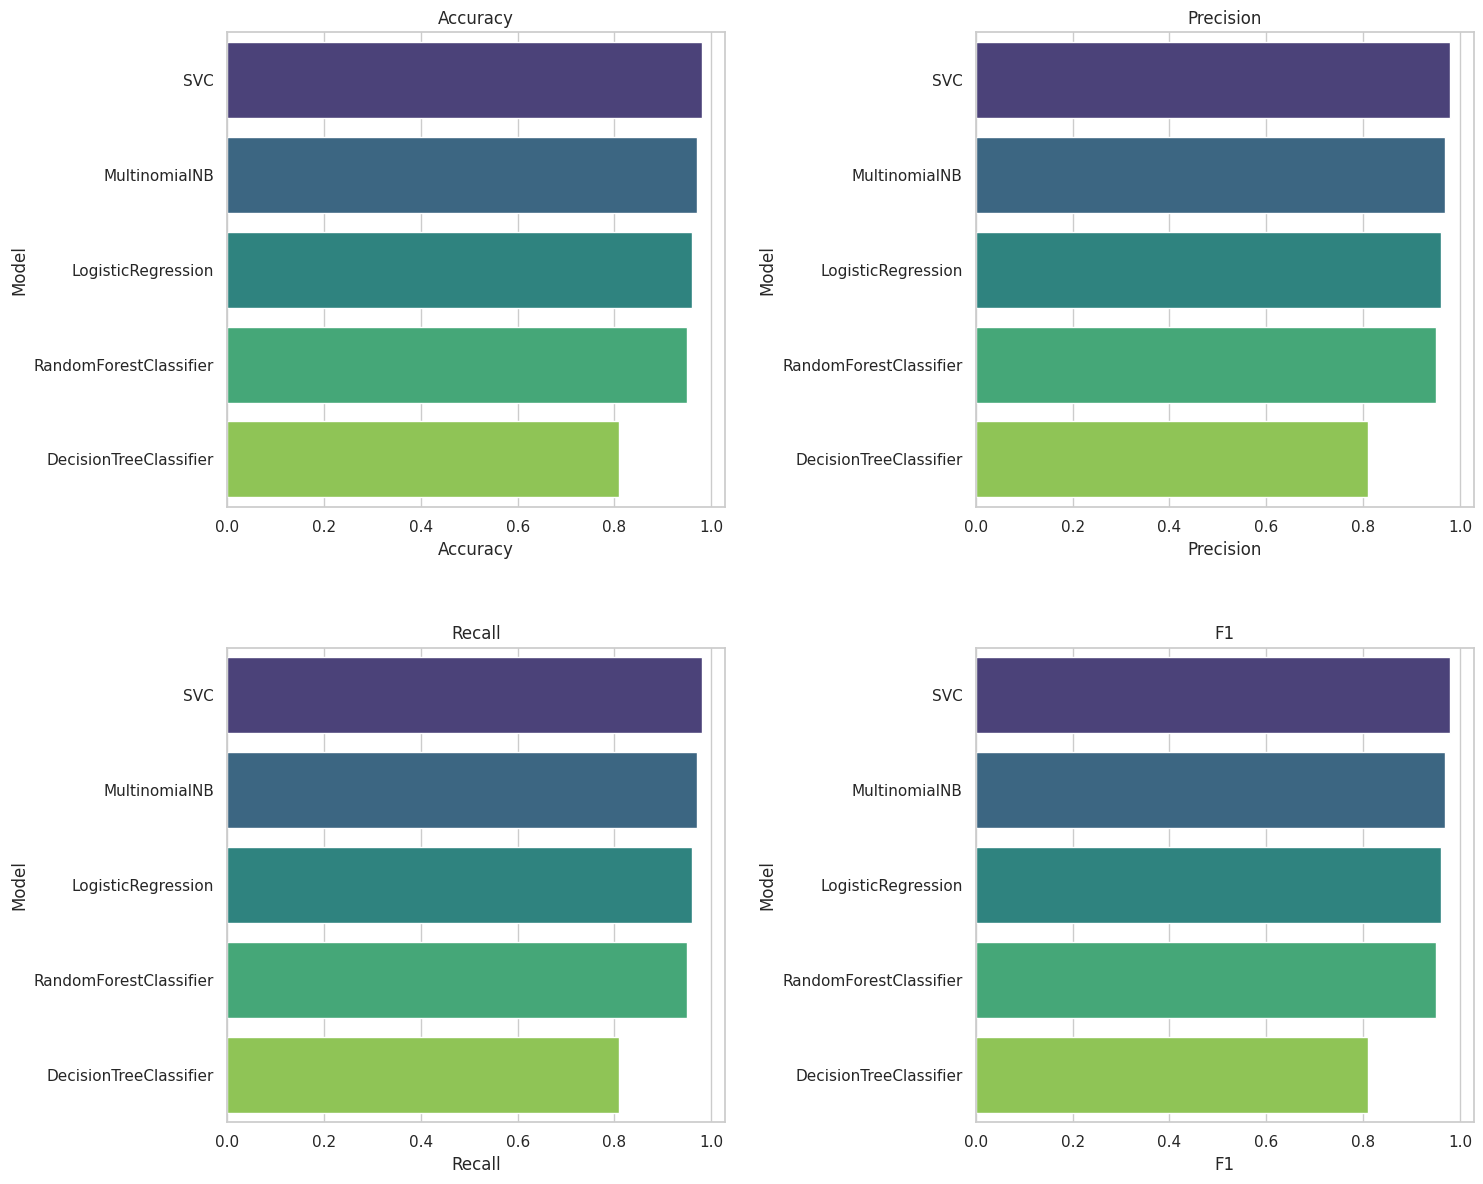

In [57]:
metrics_to_plot = [
    "accuracy",
    "precision",
    "recall",
    "f1",
]

plt.figure(figsize=(15, 12))

for i, metric in enumerate(metrics_to_plot, 1):
    sorted_df = results_df.sort_values(by=metric, ascending=False)
    plt.subplot(2, 2, i)
    sns.barplot(x=metric, y="Model", data=sorted_df, palette="viridis")
    plt.title(metric.capitalize())
    plt.xlabel(metric.capitalize())
    plt.ylabel("Model")

plt.tight_layout(w_pad=2, h_pad=4)
plt.show()


In [58]:
!pip install joblib


In [59]:
import joblib

joblib.dump(svc, 'SVM_model.joblib')
joblib.dump(vectorizer, 'vectorizer.joblib')
joblib.dump(label_encoder, 'label_encoder.joblib')

with open('preprocess_text_function.pkl', 'wb') as file:
    joblib.dump(preprocess_text, file)

svc = joblib.load('SVM_model.joblib')
vectorizer = joblib.load('vectorizer.joblib')
label_encoder = joblib.load('label_encoder.joblib')

with open('preprocess_text_function.pkl', 'rb') as file:
    preprocess_text = joblib.load(file)


In [60]:
text = """Robert Lewandowski scored twice in three minutes as La Liga leaders Barcelona thrashed Real Madrid in El Clasico to move six points clear of their rivals.
Real were looking to extend their run of unbeaten games to 43 in the league, which would have equalled the record set by Barcelona between April 2017 and May 2018.
But their hopes of doing that were quashed by a devastating second-half display by their opponents at the Bernabeu.
"It's a hard moment, a tough moment when you lose a game, [especially after] so many unbeaten," said Madrid coach Carlo Ancelotti.
After a goalless first half, Lewandowski broke the deadlock in the 54th minute with a clinical finish from Marc Casado's through ball.
The Poland striker then stunned the hosts with a second, heading Alejandro Balde's cross into the right corner.
Lewandowski had two good chances to complete a hat-trick, hitting the woodwork from the first before firing over from a good position.
Spanish teenage star Lamine Yamal, 17, got Barcelona's third when he drove into the top corner from an angle, with his goal making him the youngest-ever scorer in El Clasico.
Raphinha then lobbed a fourth late on for his first goal against Real Madrid.
The result ensured Kylian Mbappe's first taste of the famous fixture ended in defeat with the France striker having had two goals disallowed for offside and also been denied by Inaki Pena in the Barcelona goal."""
processed_text = preprocess_text(text)
X_new = vectorizer.transform([processed_text])